In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [ ]:
wines = datasets.load_wine()
variables = np.array(wines.feature_names)
x_wines = wines.data
y_wines = wines.target

In [ ]:
scaler = StandardScaler()
scaler.fit(wines.data)

x_scaled = scaler.transform(wines.data)
x = pd.DataFrame(x_scaled, columns=variables)
y = pd.DataFrame(y_wines, columns=['Target'])

x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Cantidad de Centroides: 1 ---  Precision: 0.0
Cantidad de Centroides: 2 ---  Precision: 0.3887
Cantidad de Centroides: 3 ---  Precision: 0.9149
Cantidad de Centroides: 4 ---  Precision: 0.7492
Cantidad de Centroides: 5 ---  Precision: 0.6372
Cantidad de Centroides: 6 ---  Precision: 0.6842
Cantidad de Centroides: 7 ---  Precision: 0.554
Cantidad de Centroides: 8 ---  Precision: 0.3955
Cantidad de Centroides: 9 ---  Precision: 0.427
Cantidad de Centroides: 10 ---  Precision: 0.3752


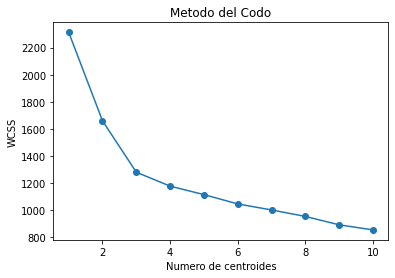

Se recomienda emplear una cantidad de 3 centroides, para asi garantizar una precision de 0.9149


In [ ]:
wccs =[]
n = 1
acc = 0
for i in range(1, 11):
    codo = KMeans(n_clusters = i, max_iter = 1000, random_state = 0)
    codo.fit(x)
    y_kmeans = codo.predict(x)
    wccs.append(codo.inertia_)
    accuracy =  round(metrics.adjusted_rand_score(y_wines, y_kmeans), 4)
    print(f'Cantidad de Centroides: {i} ---  Precision: {accuracy}')
    if accuracy > acc:
        acc = accuracy
        n = i

plt.plot(range(1, 11), wccs, marker='o')
plt.title('Metodo del Codo')
plt.xlabel('Numero de centroides')
plt.ylabel('WCSS')
plt.show()
print(f"Se recomienda emplear una cantidad de {n} centroides, para asi garantizar una precision de {acc}")

In [ ]:
modelo = KMeans(n_clusters = n, max_iter = 1000)
modelo.fit(x)
y_labels = modelo.labels_
y_kmeans = modelo.predict(x)
print('predicciones ', y_kmeans)
y_kmeans_df = pd.DataFrame(y_kmeans, columns = ['Prediction'])

predicciones  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
accuracy =  metrics.adjusted_rand_score(y_wines, y_kmeans)
print(round(accuracy, 5))

0.89749


In [ ]:
import seaborn as sns

Z = pd.concat([x, y_kmeans_df], axis = 1)
Z

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Prediction
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,0
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,0
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,0
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,0


Text(0, 0.5, 'proline')

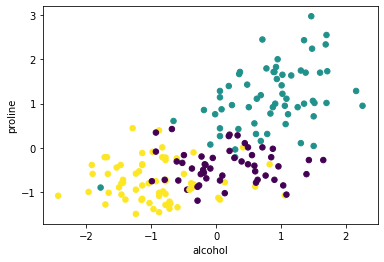

In [ ]:
plt.scatter(Z['alcohol'], Z['proline'], c= Z['Prediction'], s=30)
plt.xlabel('alcohol', fontsize=10)
plt.ylabel('proline', fontsize=10)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=40931ed2-7739-4adb-9eb8-1b9a5da6dfc3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>